# Homework 3. Carlos Alvarado

### Initial Settings

In [1]:
import sys
sys.path.append('./source')

from step1_read_data import read_data
from step2_explore import describe_column, tabular, histogram, print_explore
from step3_preprocess import fill_miss, convert_column_type
from step4_create_features import discretize, make_dummies
from step5_classifiers import make_model
from step6_evaluate import evaluate, precision_at_k

%matplotlib inline


### Config Variables

In [3]:
FILENAME = 'data/credit-data.csv'

large_grid = { 
    'RF': {'n_estimators': [1,10,100], 'max_features': ['sqrt','log2'], 'min_samples_split': [2,5,10], 'criterion':['gini', 'entropy']},
    'BA': {'n_estimators': [1,10,100], 'max_samples': [0.5, 1, 2], 'max_features': [0.5, 1 ,2]},
    'AB': {'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [1,10,100]},
    'LR': {'penalty': ['l1','l2'], 'C': [0.0001,0.01,0.1,1,10]},
    'SVM':{'C' :[0.0001,0.01,0.1,1,10],'kernel':['linear']},
    'LSVM':{'C' :[0.0001,0.01,0.1,1,10], 'loss':['hinge', 'squared_hinge']},
    'DT': {'criterion': ['gini', 'entropy'], 'max_depth': [1,10,50,100], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5,10]},
    'KNN':{'n_neighbors': [1,10,50,100],'weights': ['uniform','distance'],'algorithm': ['ball_tree','kd_tree']}
           }

test_grid = { 
    'RF': {'n_estimators': [1], 'max_depth': [1], 'max_features': ['sqrt'],'min_samples_split': [10]},
    'BA': {},
    'AB': { 'algorithm': ['SAMME'], 'n_estimators': [1]},
    'LR': { 'penalty': ['l1'], 'C': [0.01]},
    'SVM':{'C' :[0.01],'kernel':['linear']},
    'LSVM':{'C' :[0.01]},
    'DT': {'criterion': ['gini'], 'max_depth': [1], 'max_features': ['sqrt'],'min_samples_split': [10]},    
    'KNN':{'n_neighbors': [5],'weights': ['uniform'],'algorithm': ['auto']}
           }

In [4]:
large_grid

{'AB': {'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [1, 10, 100]},
 'BA': {'max_features': [0.5, 1, 2],
  'max_samples': [0.5, 1, 2],
  'n_estimators': [1, 10, 100]},
 'DT': {'criterion': ['gini', 'entropy'],
  'max_depth': [1, 10, 50, 100],
  'max_features': ['sqrt', 'log2'],
  'min_samples_split': [2, 5, 10]},
 'KNN': {'algorithm': ['ball_tree', 'kd_tree'],
  'n_neighbors': [1, 10, 50, 100],
  'weights': ['uniform', 'distance']},
 'LR': {'C': [0.0001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
 'LSVM': {'C': [0.0001, 0.01, 0.1, 1, 10], 'loss': ['hinge', 'squared_hinge']},
 'RF': {'criterion': ['gini', 'entropy'],
  'max_features': ['sqrt', 'log2'],
  'min_samples_split': [2, 5, 10],
  'n_estimators': [1, 10, 100]},
 'SVM': {'C': [0.0001, 0.01, 0.1, 1, 10], 'kernel': ['linear']}}

### Step 1. Read Data

In [5]:
# Read Data into Pandas object
data = read_data(FILENAME)

### Step 2. Explore data

PersonID                                  int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
zipcode                                   int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object
-----------------------------------------
Describing variable: PersonID
count    150000.000000
mean      75000.500000
std       43301.414527
min           1.000000
25%       37500.750000
50%       75000.500000
75%      112500.250000
max      150000.000000
Name: PersonID, dtype: float64

Unique values: 150000

Missing values: 0
---------------------------------

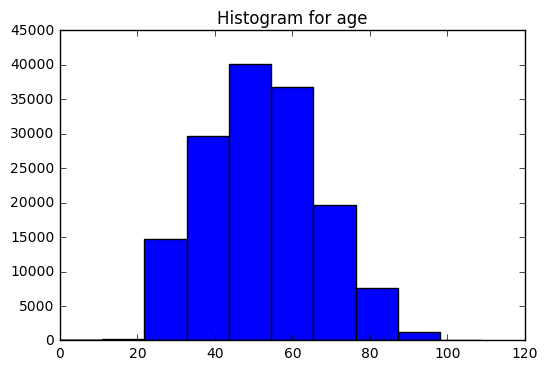

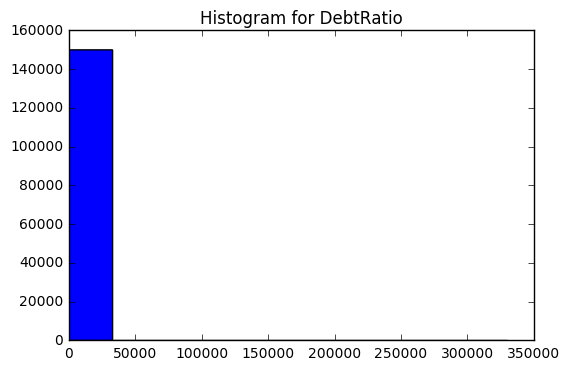

In [6]:
print_explore(data)

### Step 3. Pre-process data

In [7]:
# Convert SeriousDlqin2yrs to booleans (this is Y, the outcome variable)
convert_column_type(data, 'SeriousDlqin2yrs', 'bool', value_if_true = 1)

#Convert NumberOfDependents to integers
convert_column_type(data, 'NumberOfDependents', 'int')

In [8]:
# Debt Ratio over 10000% is very unlikely
data['DebtRatio'].loc[data['DebtRatio'] > 10000] = None

# Note to myself: create winsorize function for next assignment

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
#Variables with missing values: MonthlyIncome, NumberOfDependents
data = fill_miss(data, 'MonthlyIncome', method='mean')
data = fill_miss(data, 'NumberOfDependents', method='median')
data = fill_miss(data, 'DebtRatio', method='median')

# Note to me: add more methods in the future: nearest neighbor or other classification method

### Step 4. Create Features

In [10]:
discretize(data, 'MonthlyIncome', nbins=5, cut_type='quantile')
discretize(data, 'DebtRatio', nbins=5, cut_type='logspace')

Warning, DebtRatio has negative or zero values


In [11]:
make_dummies(data, 'NumberOfDependents')
make_dummies(data, 'DebtRatio_cat')
make_dummies(data, 'MonthlyIncome_cat')

0 <class 'numpy.float64'> 2.0
1 <class 'numpy.float64'> 1.0
2 <class 'numpy.float64'> 0.0
3 <class 'numpy.float64'> 3.0
4 <class 'numpy.float64'> 4.0
5 <class 'numpy.float64'> 5.0
6 <class 'numpy.float64'> 6.0
7 <class 'numpy.float64'> 8.0
8 <class 'numpy.float64'> 7.0
9 <class 'numpy.float64'> 20.0
10 <class 'numpy.float64'> 10.0
11 <class 'numpy.float64'> 9.0
12 <class 'numpy.float64'> 13.0
0 <class 'str'> (0.158, 6.294]
1 <class 'str'> (0.00398, 0.158]
2 <class 'str'> (250.344, 9958]
3 <class 'str'> [0.0001, 0.00398]
4 <class 'str'> (6.294, 250.344]
5 <class 'float'> nan
0 <class 'str'> (9083, 3008750]
1 <class 'str'> [0, 3000]
2 <class 'str'> (3000, 4546]
3 <class 'str'> (6301, 9083]
4 <class 'str'> (4546, 6301]


In [12]:
#get column names to select features
data.columns

Index(['PersonID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',
       'MonthlyIncome_cat', 'DebtRatio_cat', 'NumberOfDependents_0',
       'NumberOfDependents_1', 'NumberOfDependents_2', 'NumberOfDependents_3',
       'NumberOfDependents_4', 'NumberOfDependents_5', 'NumberOfDependents_6',
       'NumberOfDependents_7', 'NumberOfDependents_8', 'NumberOfDependents_9',
       'NumberOfDependents_10', 'NumberOfDependents_11',
       'NumberOfDependents_12', 'DebtRatio_cat_0', 'DebtRatio_cat_1',
       'DebtRatio_cat_2', 'DebtRatio_cat_3', 'DebtRatio_cat_4',
       'DebtRatio_cat_5', 'MonthlyIncome_cat_0', 'MonthlyIncome_cat_1',
       'MonthlyIncome_cat_2', 'MonthlyIncome_cat_3', 'MonthlyIncome_cat_4'],
   

### Steps 5 and 6. Classify and Evaluate

In [15]:
try:
    from sklearn.model_selection import train_test_split
except:
    from sklearn.cross_validation import train_test_split

from sklearn.grid_search import ParameterGrid
from sklearn.metrics import roc_auc_score

import pandas as pd

import time

FEATURES = ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfDependents', 'age', 'MonthlyIncome_cat_0',
       'MonthlyIncome_cat_1', 'MonthlyIncome_cat_2', 'MonthlyIncome_cat_3',
       'MonthlyIncome_cat_4', 'DebtRatio_cat_0',
       'DebtRatio_cat_1', 'DebtRatio_cat_2', 'DebtRatio_cat_3',
       'DebtRatio_cat_4', 'DebtRatio_cat_5', 'NumberOfTimes90DaysLate', 
        'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 
            'NumberOfTime60-89DaysPastDueNotWorse']

#added RevolvingUtilizationOfUnsecuredLines and NumberOfTimes90DaysLate

#add 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 
    #'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse'

MODELS_TO_RUN = ['RF', 'BA', 'AB', 'LR', 'LSVM', 'DT'] #I'm not running SVM or KNN because takes too much time

GRID = large_grid

X = data.loc[:, FEATURES ]

Y = data['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=None)

results_df =  pd.DataFrame(columns=(
        'model_type','clf', 'parameters', 'auc-roc','p_at_5', 'p_at_10', 'p_at_20', 'elapsed'))

for model_name in MODELS_TO_RUN:
    print(model_name)
    clf = make_model(model_name)
    parameter_values = GRID[model_name]
    
    for p in ParameterGrid(parameter_values):
        print(p)
        clf.set_params(**p)
        init_time = time.perf_counter()
        try:
            y_pred_probs = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]
        except:
            y_pred_probs = clf.fit(X_train, y_train).decision_function(X_test)
        elapsed = time.perf_counter() - init_time
        
        y_pred_probs_sorted, y_test_sorted = zip(*sorted(zip(y_pred_probs, y_test), reverse=True))
        results_df.loc[len(results_df)] = [model_name, clf, p,
                                       roc_auc_score(y_test, y_pred_probs),
                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,5.0),
                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,10.0),
                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,20.0),
                                       elapsed]


RF
{'min_samples_split': 2, 'criterion': 'gini', 'n_estimators': 1, 'max_features': 'sqrt'}
{'min_samples_split': 2, 'criterion': 'gini', 'n_estimators': 10, 'max_features': 'sqrt'}
{'min_samples_split': 2, 'criterion': 'gini', 'n_estimators': 100, 'max_features': 'sqrt'}
{'min_samples_split': 5, 'criterion': 'gini', 'n_estimators': 1, 'max_features': 'sqrt'}
{'min_samples_split': 5, 'criterion': 'gini', 'n_estimators': 10, 'max_features': 'sqrt'}
{'min_samples_split': 5, 'criterion': 'gini', 'n_estimators': 100, 'max_features': 'sqrt'}
{'min_samples_split': 10, 'criterion': 'gini', 'n_estimators': 1, 'max_features': 'sqrt'}
{'min_samples_split': 10, 'criterion': 'gini', 'n_estimators': 10, 'max_features': 'sqrt'}
{'min_samples_split': 10, 'criterion': 'gini', 'n_estimators': 100, 'max_features': 'sqrt'}
{'min_samples_split': 2, 'criterion': 'gini', 'n_estimators': 1, 'max_features': 'log2'}
{'min_samples_split': 2, 'criterion': 'gini', 'n_estimators': 10, 'max_features': 'log2'}
{'min

In [16]:
results_df.to_csv('data_output_v6_allvars_with_time.csv')